In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

In [13]:
import matplotlib as mpl

#fontpath = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
#mpl.font_manager.FontProperties(fname=fontpath)

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [30]:
df = pd.read_csv('ssv2.csv')

In [50]:
df.head()

,date,p1,p2,psum,covid,winter
0,202001,58732,4858,63590,41,2
1,202002,13328,1003,14331,10994,3
2,202003,18798,113,18911,242673,8
3,202004,51608,191,51799,315359,11
4,202005,89850,1016,90866,331239,18


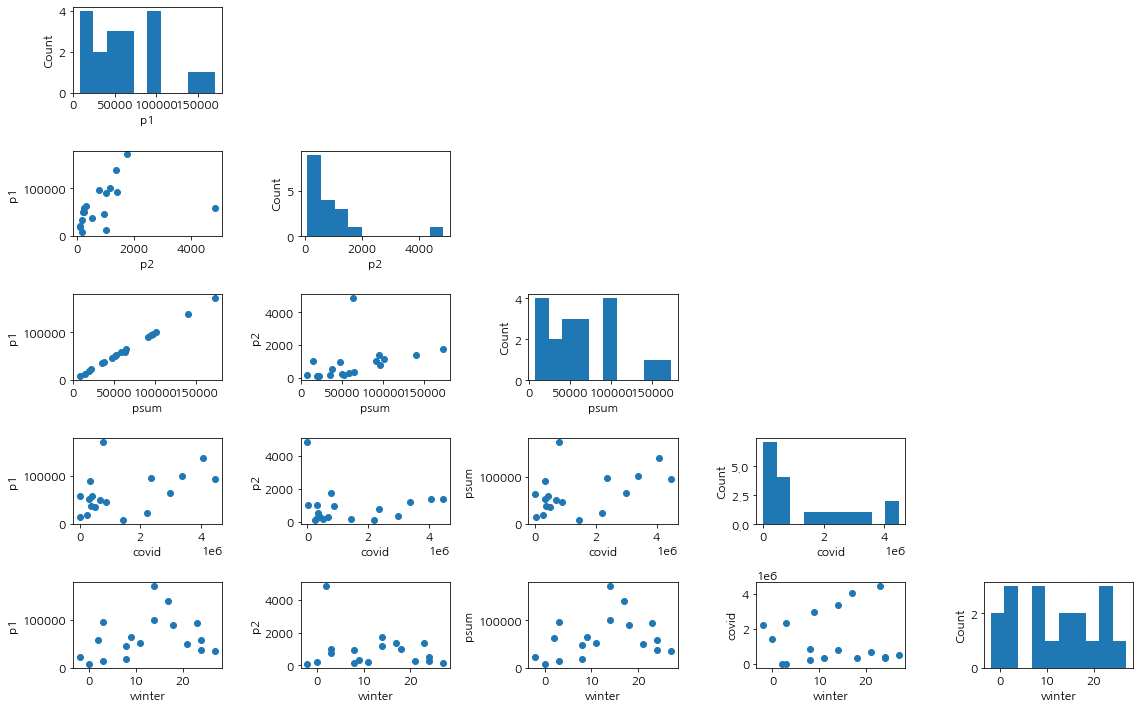

In [49]:
cols = ['p1','p2','psum','covid','winter']
scatterplotmatrix(df[cols].values, figsize=(16,10), names=cols, alpha=1)
plt.tight_layout()
plt.show()

In [37]:
from mlxtend.plotting import heatmap

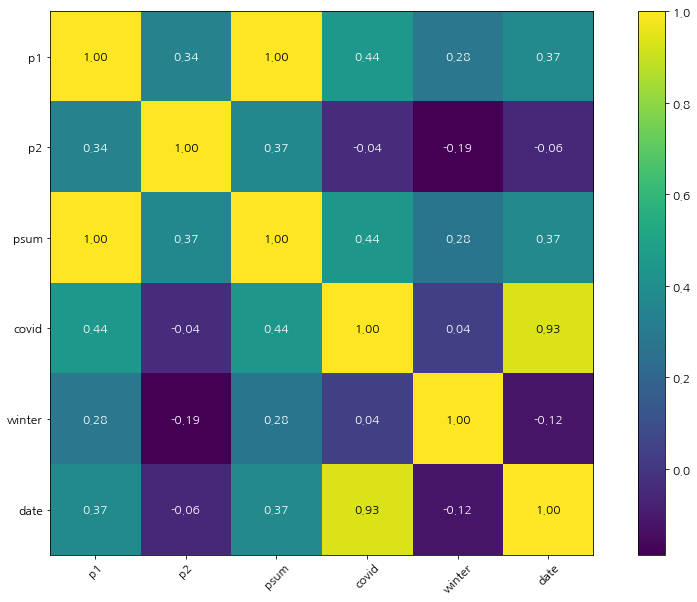

In [46]:
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(16,10))
plt.show()

In [39]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, Y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)

In [40]:
X = df[['covid']].values
y = df['date'].values

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

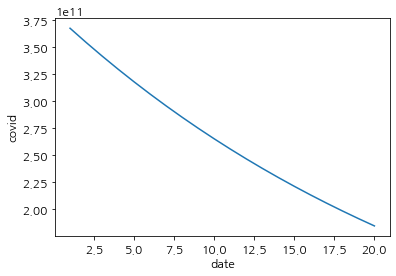

In [43]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('covid')
plt.xlabel('date')
plt.show()

In [44]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

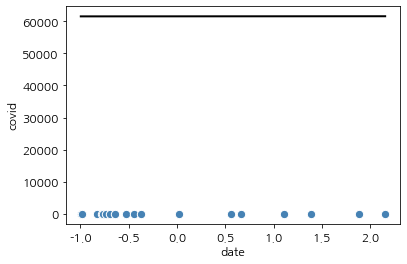

In [45]:
lin_regplot(X_std, y_std, lr)
plt.ylabel('covid')
plt.xlabel('date')
plt.show()